Una distribución exponencial tiene esta forma:

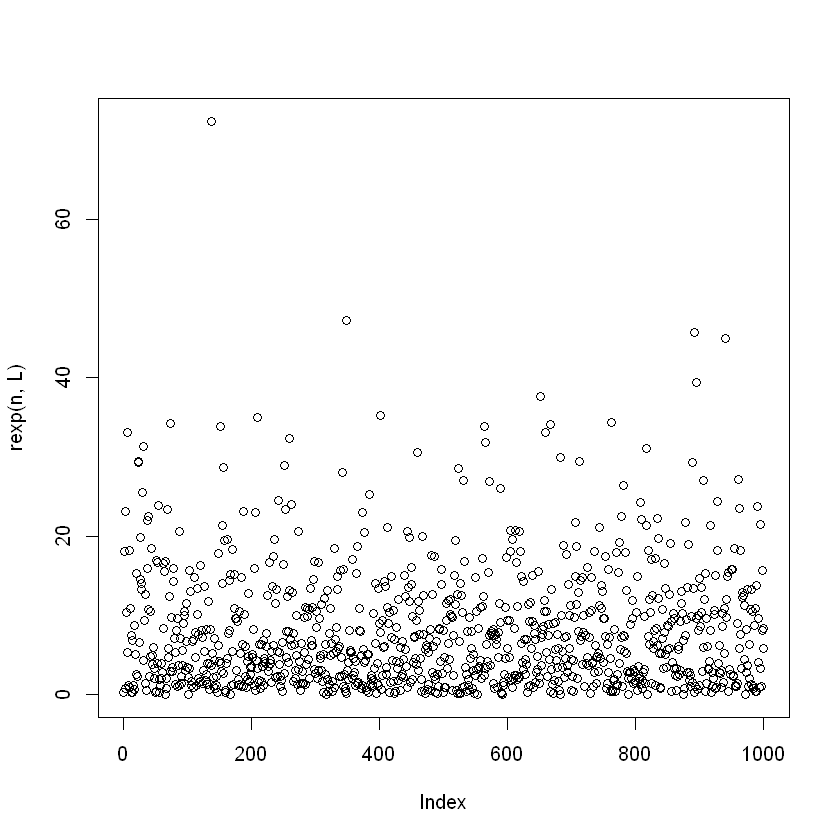

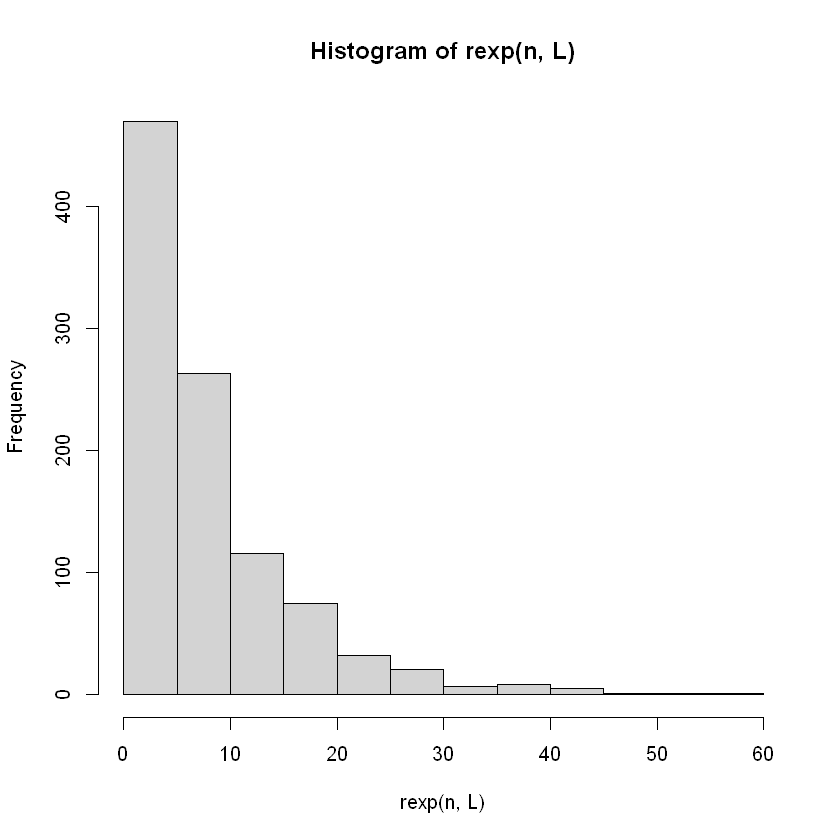

In [16]:
L <- 0.123
n <- 1000
plot(rexp(n, L))
hist(rexp(n, L))

Por otro lado, una distribución de Poisson se parece a esto:

In [7]:
L <- 5
n <- 1000  

pdf('poisson.pdf')
plot(rpois(n, L), xlab="Índice del número generado")
dev.off()

png 
  2

In [16]:
pdf('poisson.pdf')
hist(rpois(n, L), xlab="Número generado", ylab="Frecuencia", main=NULL)
dev.off()

png 
  2

Esta distribución está definida por la cantidad $k$ de veces que se da un evento cuya media de aparición en un intervalo (de tiempo o área) $\lambda$ es conocida, dada la función $$P(X = k) = \frac{\lambda^k \times e^{-\lambda}}{k!}.$$

Esta función tiene como denominador $k!$, que se podría interpretar como las distintas maneras en que se puede dar determinado sucedo. Por ejemplo, por medio del [INEGI](https://www.inegi.org.mx/sistemas/olap/consulta/general_ver4/MDXQueryDatos.asp?proy=) se sabe que la tasa de nacimientos de hombres por hora durante enero de 2018 en México fue $\lambda_1$

In [7]:
lambda1 = round(91396 / 31 / 24)
lambda1

[1] 123

A partir de eso, se podría investigar cuál es la probabilidad $p1$ de que nazcan $k1 = 100$ hombres en una hora.

In [15]:
k1 = 120
p1 = (lambda1 ** k1) * exp(-1 * lambda1) / factorial(k1)
options("scipen"=100, "digits"=4)
p1

[1] 0.03508

Mientras que el histograma sería

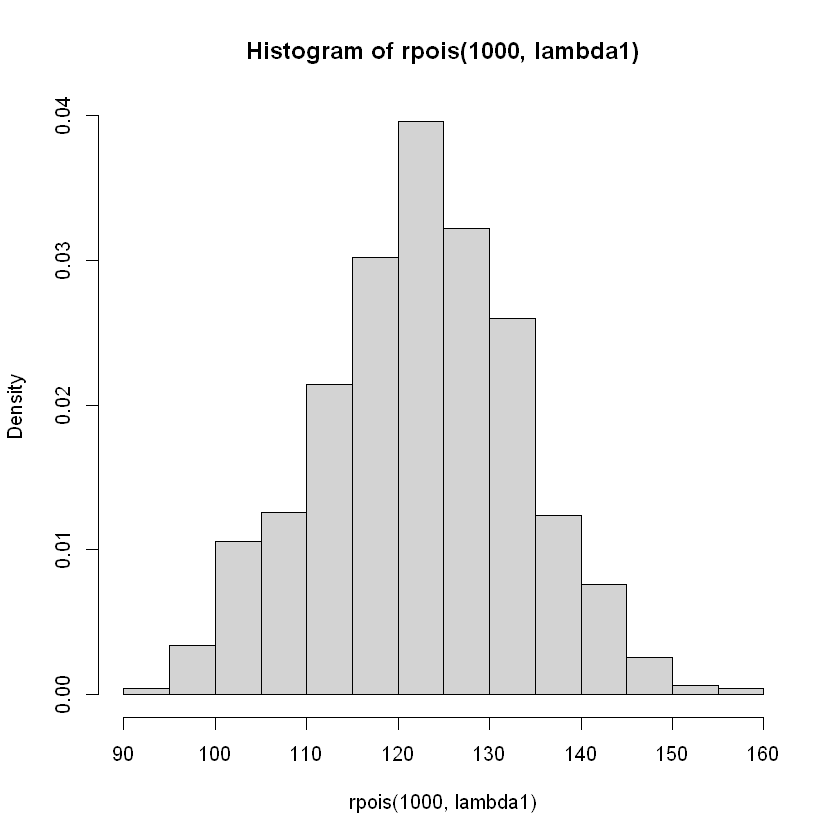

In [66]:
hist(rpois(1000, lambda1), freq = F)

Se puede intentar saber cuánto tardan en obtenerse cien veces valores menores a 0.5:

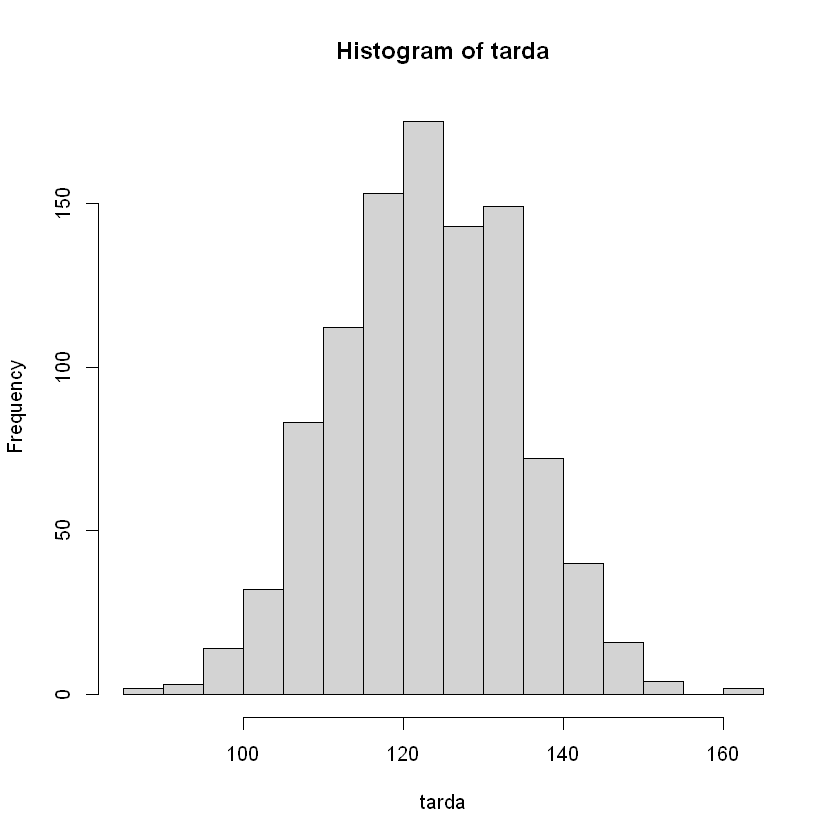

In [13]:
tarda = c()

for (i in 1:1000){
    x = 0
    sum = 0
    dale = TRUE
    while (dale){
        sum = sum + rexp(1)
        if (sum < lambda1){
            x = x + 1
        } else {
            tarda = c(tarda, x)
            dale = FALSE
        }
    }
}

hist(tarda)

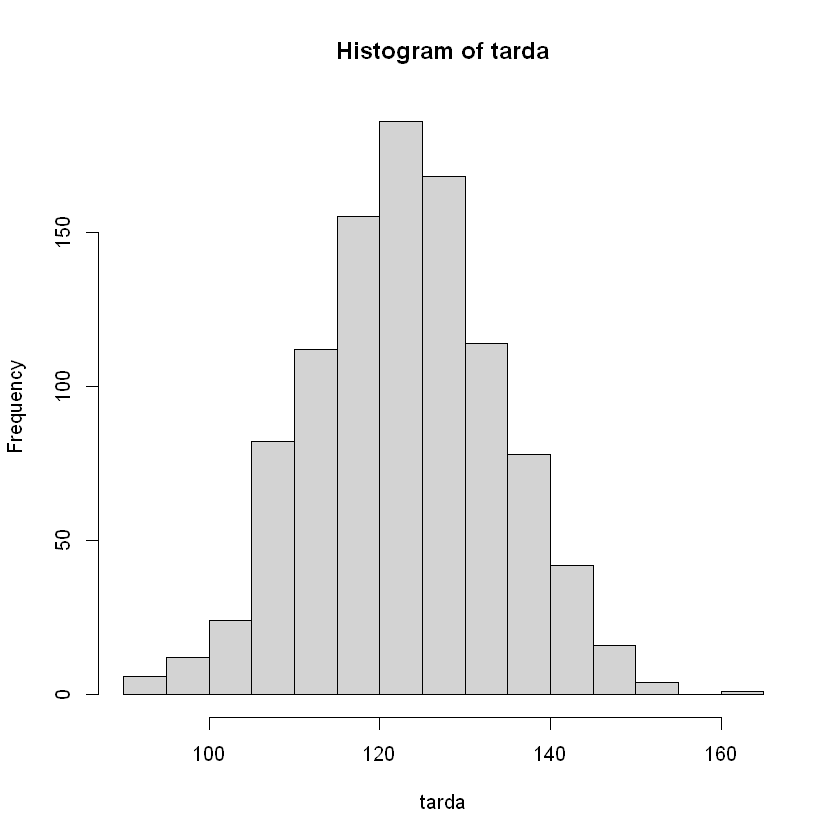

In [9]:
tarda = c()

for (i in 1:1000){
    x = 0
    prod = 1
    dale = TRUE
    while (dale){
        prod = prod * runif(1)
        if (prod > exp(-lambda1)){
            x = x + 1
        } else {
            tarda = c(tarda, x)
            dale = FALSE
        }
    }
}

hist(tarda)

Algo que se puede hacer es generar un proceso cualquiera aleatorio. Por ejemplo, uno en el que se den eventos conforme a una distribución normal con media 1 y desviación estándar 1, luego calcular la suma de 100 números generados al azar de esta manera durante 1000 repeticiones.

In [23]:
N = 10000
mu = 100
res = c()
for (n in 1:N){
    suma = sum(rnorm(100, 5, 1))
    res = c(res, suma)
}

pdf('norm.pdf')
hist(res, xlab = "Sumas de 100 números aleatorios", ylab="Frecuencia", main=NULL, cex.lab=1.5, cex.axis=1.5)
dev.off()

png 
  2

Ahora se tiene un experimento en el que se sabe que se tiene una media de 100. ¿Cómo integrar en esto la distribución de Poisson?

In [25]:
pdf('norm_poisson.pdf')
hist(rpois(N, mu * 5), xlab = "Números aleatorios", ylab="Frecuencia", main=NULL, cex.lab=1.5, cex.axis=1.5)
dev.off()

png 
  2

Ahora se puede hacer algo similar con una distribución uniforme de la que se conozca la media. Por ejemplo:

In [26]:
N = 10000
mu = 100
res = c()
for (n in 1:N){
    suma = sum(runif(mu))
    res = c(res, suma)
}
pdf('unif.pdf')
hist(res, xlab = "Sumas de 100 números aleatorios", ylab="Frecuencia", main=NULL, cex.lab=1.5, cex.axis=1.5)
dev.off()
mean(res)

png 
  2

[1] 49.98011

In [27]:
pdf('unif_poisson.pdf')
hist(rpois(N, mu / 2), xlab = "Números aleatorios", ylab="Frecuencia", main=NULL, cex.lab=1.5, cex.axis=1.5)
dev.off()

png 
  2

[1] 99.90701

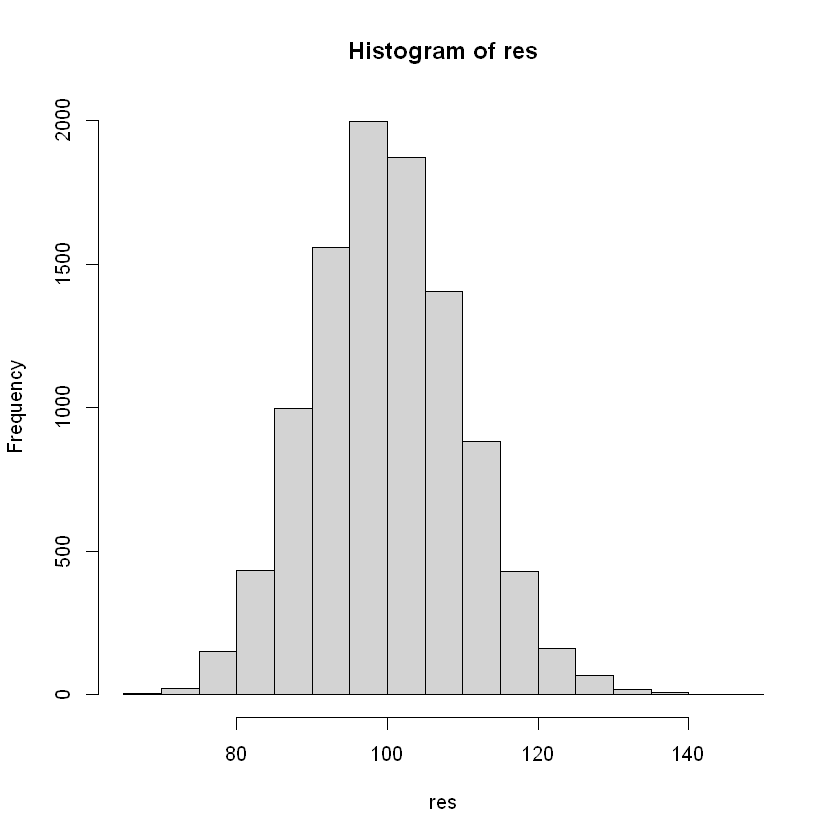

In [1]:
N = 10000
mu = 100
res = c()
for (n in 1:N){
    suma = sum(rexp(mu))
    res = c(res, suma)
}
hist(res)
mean(res)

[1] 100.0111

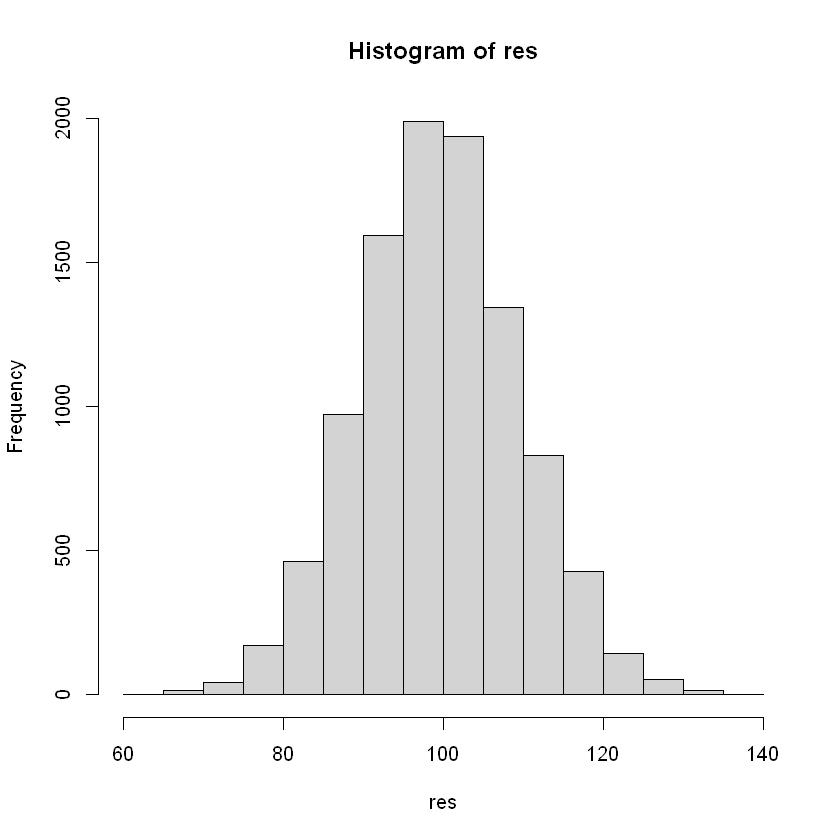

In [4]:
N = 10000
mu = 100
res = c()
for (n in 1:N){
    suma = sum(rbinom(100, 100, 0.01))
    res = c(res, suma)
}
hist(res)
mean(res)